In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [43]:
# Load the dataset
df = pd.read_csv('customer_behavior_analytcis.csv')

In [44]:
# Inspect the first few rows
df.head()

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts,customer_id
0,7.0,129.34,52.17,18.0,0.0,CM00000
1,22.0,24.18,9.19,15.0,7.0,CM00001
2,2.0,32.18,90.69,50.0,2.0,CM00002
3,25.0,26.85,11.22,16.0,10.0,CM00003
4,7.0,125.45,34.19,30.0,3.0,CM00004


In [45]:
df.shape

(999, 6)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_purchases   979 non-null    float64
 1   avg_cart_value    979 non-null    float64
 2   total_time_spent  999 non-null    float64
 3   product_click     979 non-null    float64
 4   discount_counts   999 non-null    float64
 5   customer_id       999 non-null    object 
dtypes: float64(5), object(1)
memory usage: 47.0+ KB


In [6]:
# Check for missing data
df.isnull().sum()

,0
total_purchases,20
avg_cart_value,20
total_time_spent,0
product_click,20
discount_counts,0
customer_id,0


In [47]:
# Drop rows with NaN values
df.dropna(inplace=True)

In [48]:
# Check for missing data
df.isnull().sum()

,0
total_purchases,0
avg_cart_value,0
total_time_spent,0
product_click,0
discount_counts,0
customer_id,0


In [49]:
# Basic statistics of the dataset
df.describe()

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts
count,979.000000,979.000000,979.000000,979.000000,979.000000
mean,11.570991,75.457978,49.376966,28.237998,4.309499
std,7.016327,55.067835,32.785737,16.296384,4.514147
min,0.000000,10.260000,5.120000,4.000000,0.000000
25%,6.000000,33.130000,22.330000,16.000000,1.000000
50%,10.000000,49.380000,40.310000,21.000000,2.000000
75%,17.000000,121.255000,77.270000,45.000000,8.000000
max,32.000000,199.770000,119.820000,73.000000,21.000000


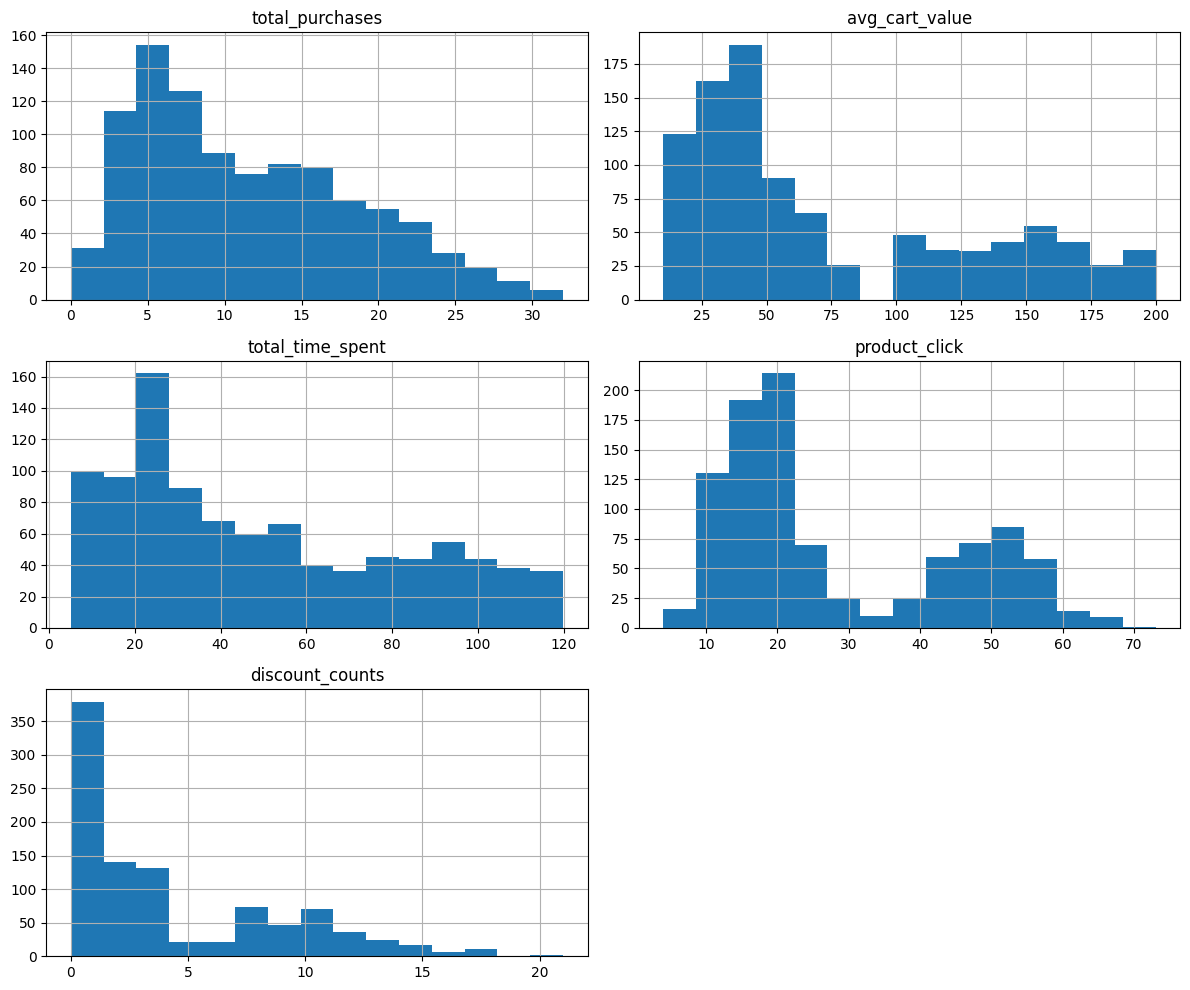

In [50]:
# Plot histograms for each feature
df.drop('customer_id', axis=1).hist(bins=15, figsize=(12, 10))
plt.tight_layout()
plt.show()

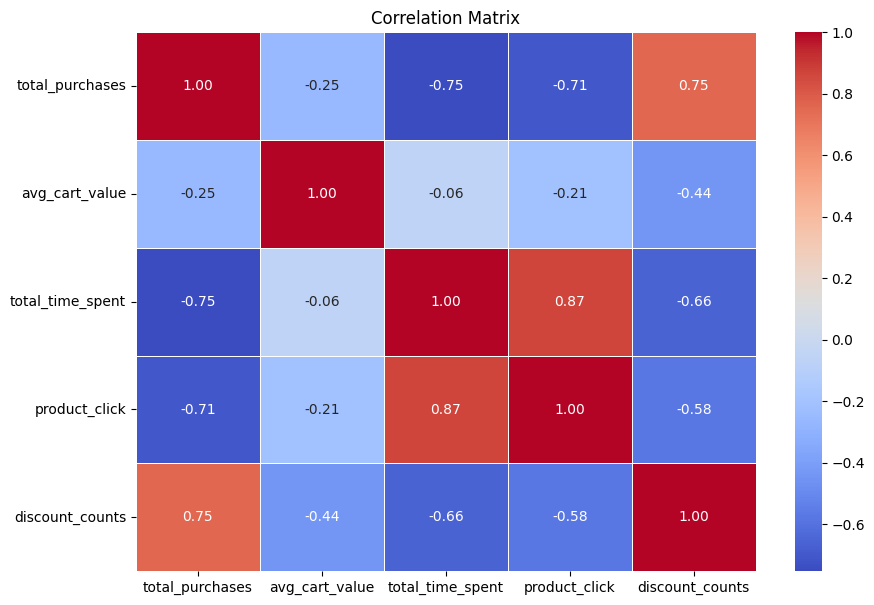

In [51]:
# Calculate the correlation matrix
corr = df.drop('customer_id', axis=1).corr()

# Plot heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

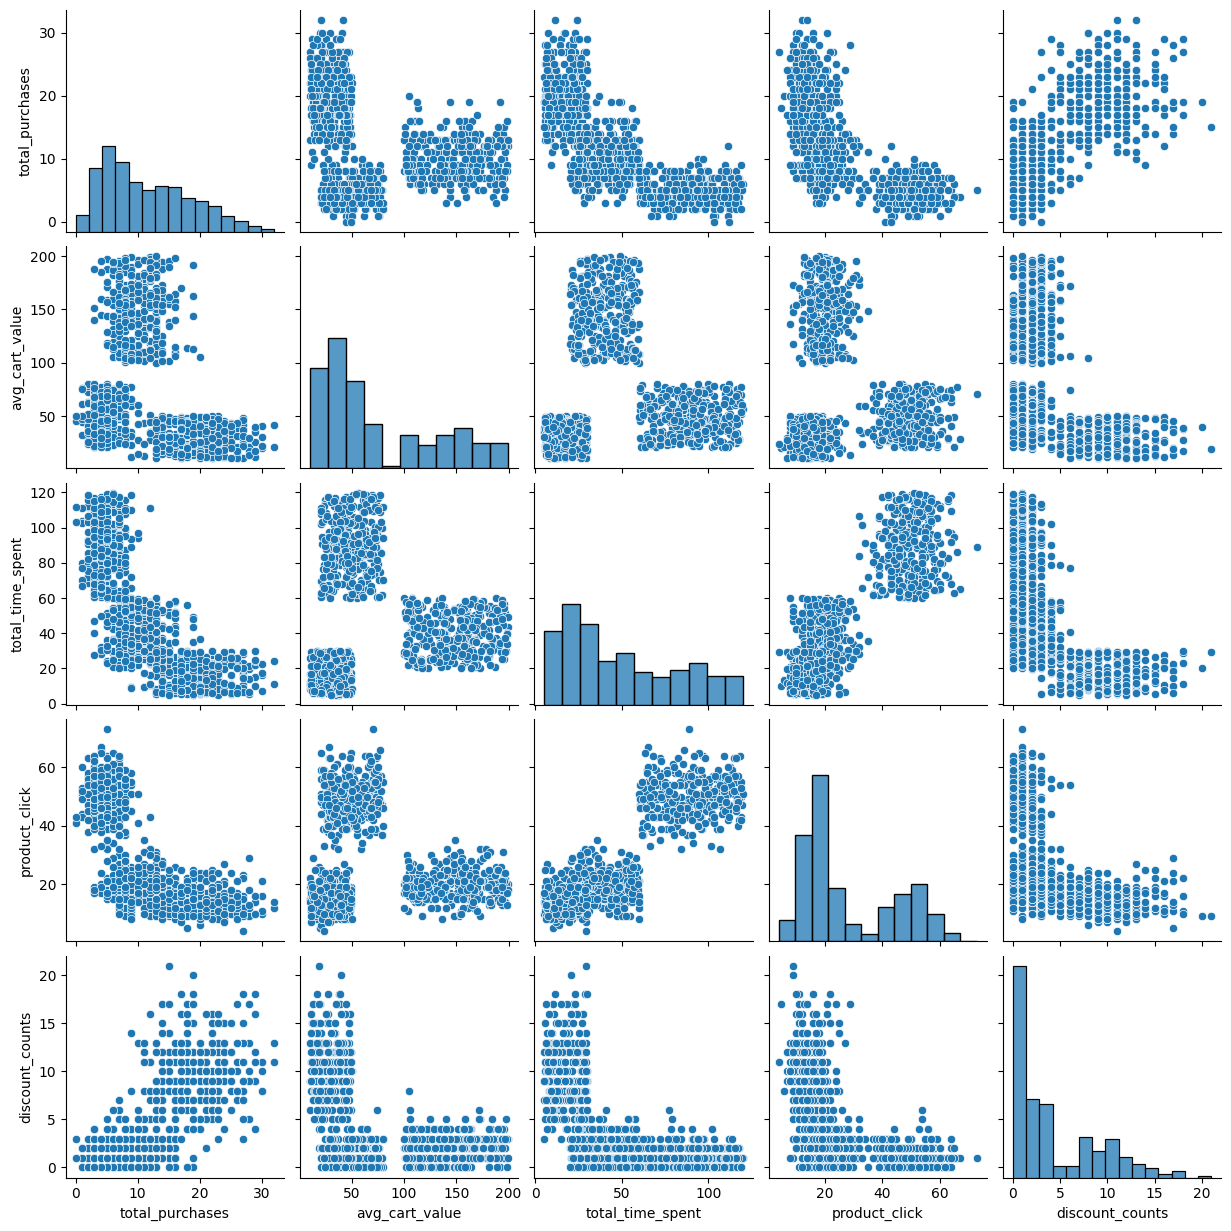

In [52]:
# Pair plot for visualizing relationships
sns.pairplot(df.drop('customer_id', axis=1))
plt.show()

In [53]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop(['customer_id'], axis=1))

# Convert back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df.drop(['customer_id'], axis=1).columns)


In [54]:
# Elbow method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

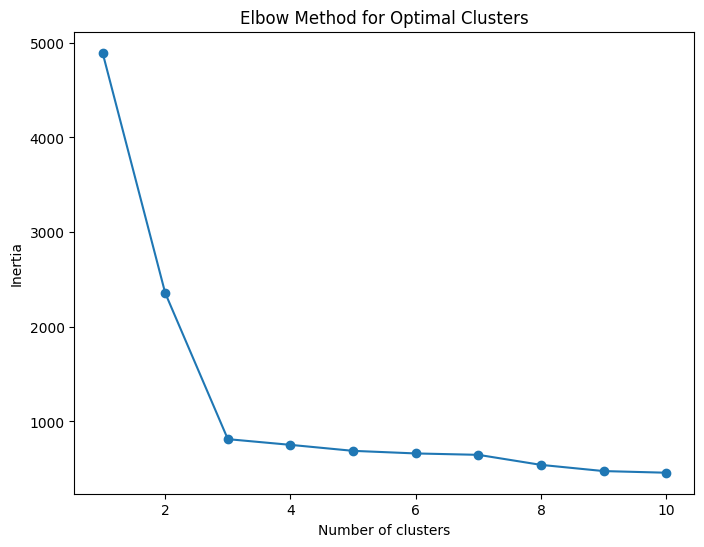

In [55]:
# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

**By observing this graph we can choose 3 as number of clusters.This number already given in the question and using this wcss method we can verify that value.**

In [56]:
# Fit KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_df)

In [57]:
# Add cluster labels to the original dataframe
df_clustered = df.copy()

In [58]:
# Print the cluster centers
centers = pd.DataFrame(kmeans.cluster_centers_, columns=scaled_df.columns)
print(centers)

   total_purchases  avg_cart_value  total_time_spent  product_click  \
0        -0.199010        1.305770         -0.277476      -0.512192   
1        -0.956571       -0.480165          1.243180       1.318663   
2         1.160839       -0.818654         -0.974183      -0.816132   

   discount_counts  
0        -0.518013  
1        -0.726757  
2         1.247639  


In [59]:
# Example of labeling clusters based on feature interpretation
df_clustered['Cluster_Label'] = df_clustered['Cluster'].map({
    2: 'Bargain Hunters',
    0: 'High Spenders',
    1: 'Window Shoppers'
})

# Display the clustered data
df_clustered.head()

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts,customer_id,Cluster,Cluster_Label
0,7.0,129.34,52.17,18.0,0.0,CM00000,0,High Spenders
1,22.0,24.18,9.19,15.0,7.0,CM00001,2,Bargain Hunters
2,2.0,32.18,90.69,50.0,2.0,CM00002,1,Window Shoppers
3,25.0,26.85,11.22,16.0,10.0,CM00003,2,Bargain Hunters
4,7.0,125.45,34.19,30.0,3.0,CM00004,0,High Spenders


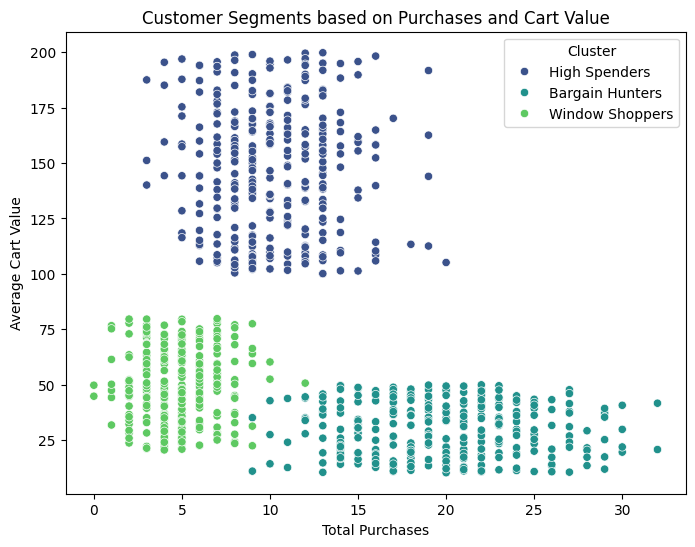

In [60]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clustered, x='total_purchases', y='avg_cart_value', hue='Cluster_Label', palette='viridis')
plt.title('Customer Segments based on Purchases and Cart Value')
plt.xlabel('Total Purchases')
plt.ylabel('Average Cart Value')
plt.legend(title="Cluster")
plt.show()


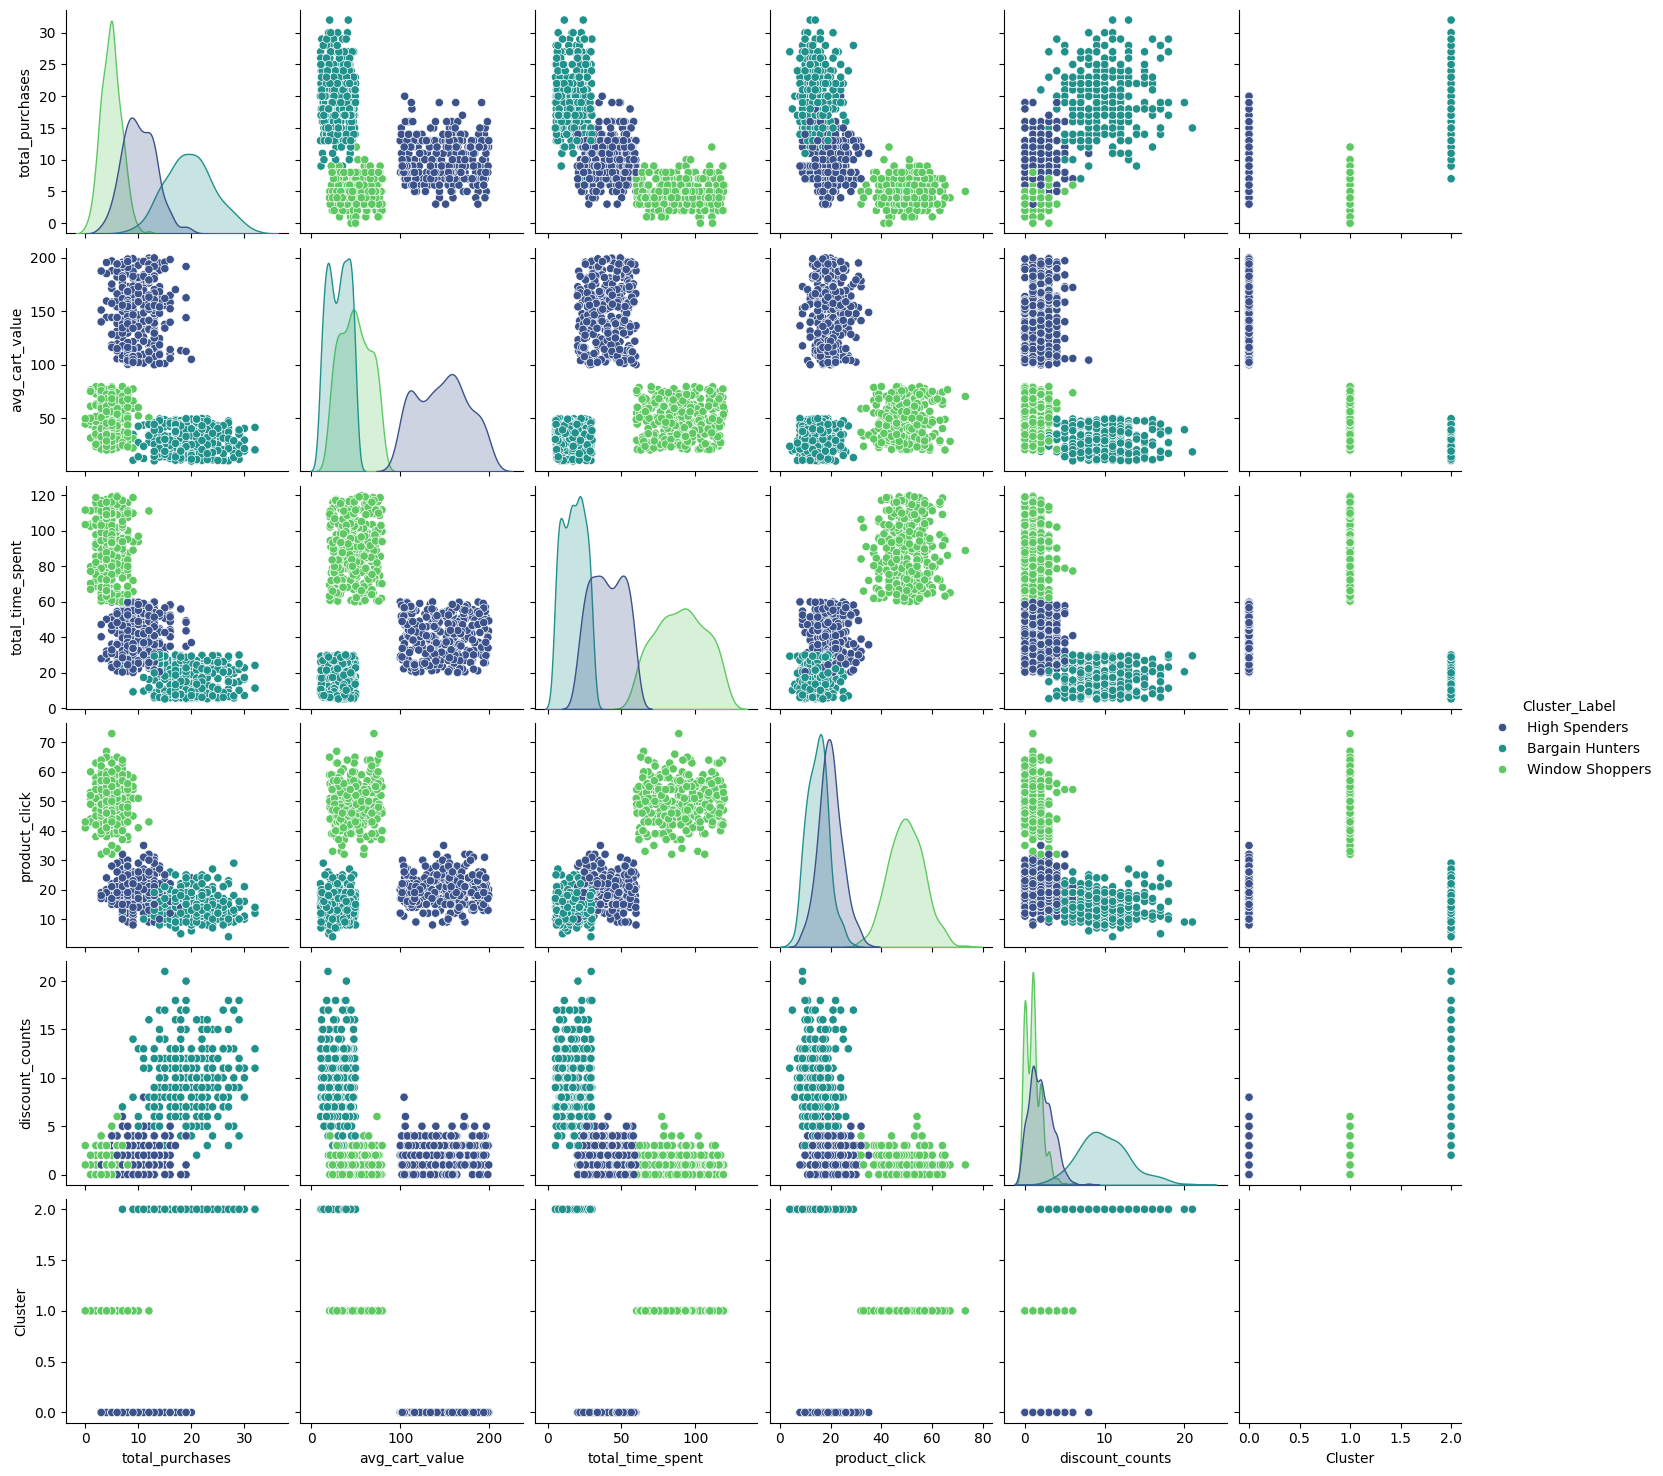

In [61]:
#visualizing pairwise plots of clusters
sns.pairplot(df_clustered, hue='Cluster_Label', diag_kind='kde', palette='viridis')
plt.show()


In [62]:
df.head()

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts,customer_id,Cluster
0,7.0,129.34,52.17,18.0,0.0,CM00000,0
1,22.0,24.18,9.19,15.0,7.0,CM00001,2
2,2.0,32.18,90.69,50.0,2.0,CM00002,1
3,25.0,26.85,11.22,16.0,10.0,CM00003,2
4,7.0,125.45,34.19,30.0,3.0,CM00004,0


In [63]:
#adding cluster label column to df_clustered data set
df['Cluster_Label'] = df_clustered['Cluster'].map({
    2: 'Bargain Hunters',
    0: 'High Spenders',
    1: 'Window Shoppers'
})

In [64]:
df.head()

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts,customer_id,Cluster,Cluster_Label
0,7.0,129.34,52.17,18.0,0.0,CM00000,0,High Spenders
1,22.0,24.18,9.19,15.0,7.0,CM00001,2,Bargain Hunters
2,2.0,32.18,90.69,50.0,2.0,CM00002,1,Window Shoppers
3,25.0,26.85,11.22,16.0,10.0,CM00003,2,Bargain Hunters
4,7.0,125.45,34.19,30.0,3.0,CM00004,0,High Spenders


**Here in this data set we have 5 features to compare for this clustering. So visualizing not an easy task this clusters. Because now its not 2D. For visualization we do a dimention reduction using PCA.**

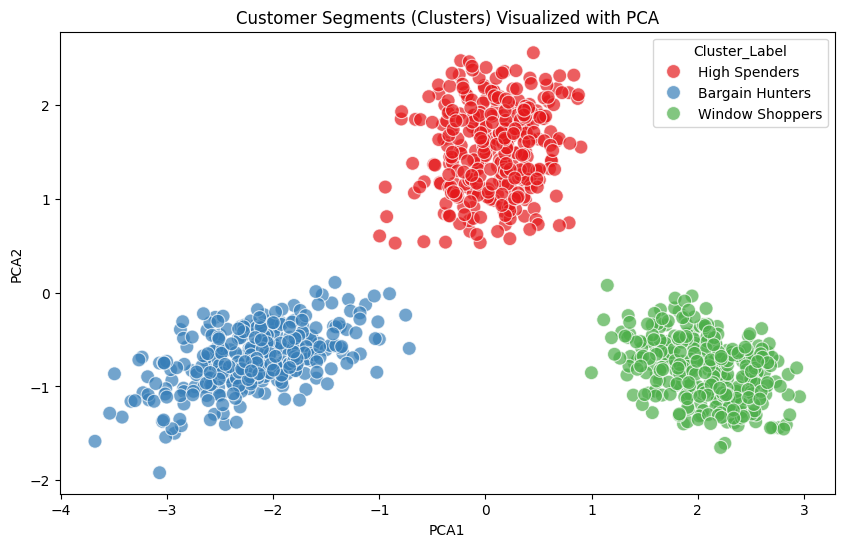

In [65]:
# Importing PCA for dimensionality reduction
from sklearn.decomposition import PCA

# Perform PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_df)

# Adding PCA components to the dataframe for visualization
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_Label', palette='Set1', data=df, s=100, alpha=0.7)
plt.title('Customer Segments (Clusters) Visualized with PCA')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


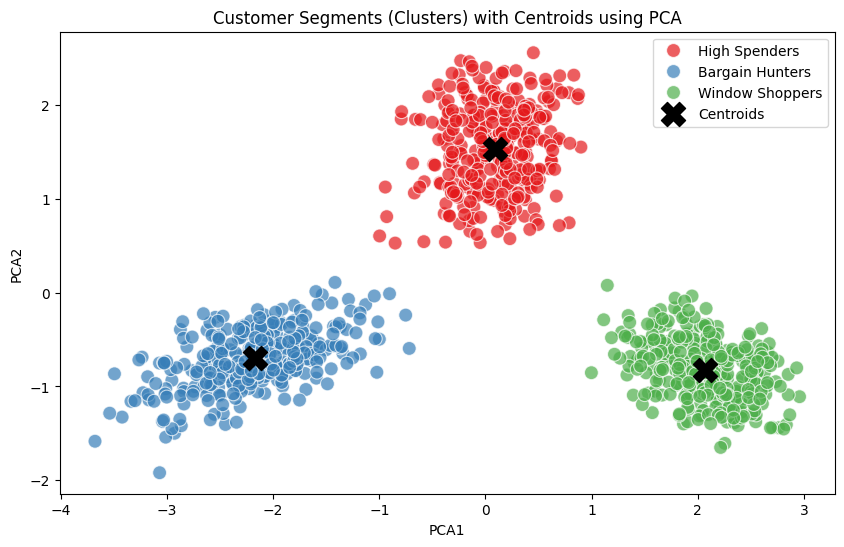

In [66]:
# Get cluster centroids from KMeans and transform them with PCA
centroids = kmeans.cluster_centers_  # Get cluster centers in original space
centroids_pca = pca.transform(centroids)  # Transform to PCA space

# Plot PCA clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_Label', palette='Set1', data=df, s=100, alpha=0.7)

# Plot centroids as larger red stars
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            c='black', marker='X', s=300, label='Centroids')

# Add title and legend
plt.title('Customer Segments (Clusters) with Centroids using PCA')
plt.legend()
plt.show()
